# Content

- PART I
- Bank Marketing Abstract
- Business Understanding
- Data set information

- PART II
- Atribute information Analysis
- Categorical to Continuous/Dummy Variables

- PART III
- Machine Learning Models (Logistic Regression, KNN, SVM, Decision Tree, Random Forest, GradientBoostingClassifier, XGBClassifier, GaussianNB)
- ROC & AUC curves
- Choosing the best model for the dependent variable

- PART IV
- Business case formulated : Lift calculated based on the probability score of each person in test set
- Adapt to IRR & NIR

- PART V
- Approaches:
- 1. Baseline model
- 2. Traditional Approach
- 3. Two Models Approach
- 4. Using a Single Model with Treatment Indicator Variabl
- 5. Four Quadrant Approach

# PART I

Bank Marketing
Abstract:

- A Portuguese bank conducted seventeen telephone marketing campaigns between May 2008 and November 2010. The bank recorded client contact information for each telephone call. 
- The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Business Understanding
- A term deposit is a deposit held at a financial institution that has a fixed term. These are generally short term with maturities ranging anywhere from a month to a few years. When a term deposit is purchased, the lender (the customer) understands that the money can only be withdrawn after a term has ended or by giving a predetermined number of days’ notice.
- Term deposits are an extremely safe investment and are therefore very appealing to conservative, low risk investors.
- Instead of mass marketing, the bank has chosen to be more proactive in identifying potential buyers and communicate straight to the customers via telephone calls.
- Direct marketing is useful here because its positive results can be measured directly.


Data Set Information:
- The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Input variables:
   Attribute Information:
1. Bank client data:
Age (numeric)
Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

2. Related with the last contact of the current campaign:

Contact: contact communication type (categorical: 'cellular','telephone')

Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').

3. Other attributes:

Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

Previous: number of contacts performed before this campaign and for this client (numeric)

Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

4. Social and economic context attributes:

Emp.var.rate: employment variation rate - quarterly indicator (numeric)

Cons.price.idx: consumer price index - monthly indicator (numeric)

Cons.conf.idx: consumer confidence index - monthly indicator (numeric)

Euribor3m: euribor 3 month rate - daily indicator (numeric)

Nr.employed: number of employees - quarterly indicator (numeric)

- Output variable (desired target):

- y - has the client subscribed a term deposit? (binary: 'yes', 'no')

Source:

Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

# PART II

In [1]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load in the data

train_data = '../input/'
train_data = pd.read_csv(r'C:\Users\rol3x\MAIN_PATH\bank-additional-full.csv',delimiter =';')

# Have a grasp of how our data looks.
train_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
poutcomes = train_data[train_data.poutcome != 'nonexistent'].poutcome.apply(lambda x: 1 if x == 'success' else 0)
coutcomes = train_data.y.apply(lambda x: 1 if x == 'yes' else 0)

print('Number of records:', len(train_data))
print('Success Rate (Current Campaign):', coutcomes.sum() / len(train_data))
print('Success Rate (Previous Campaign):', poutcomes.sum() / len(poutcomes))

Number of records: 41188
Success Rate (Current Campaign): 0.11265417111780131
Success Rate (Previous Campaign): 0.24408888888888888


- We have a dataset with a number of 41.188 records, consisting of information about the bank clients gatheres during the promotional campaign.
- During the currect campaign, the success rate, in which a client has responded 'yes' to opening a term deposit was 11,3 %.
- During the previous campaign, the success rate was higher, couting with 24 %.

In [12]:
# Treating the variables to avoid future errors when using predictive models

dtypes = pd.DataFrame(train_data.dtypes.rename('type')).reset_index().astype('str')

# For now exclude duration since it is a poor variable for descriptive analysis, rebuild for Promotion variable !!!!!!!!
dtypes = dtypes.query('index != "duration"')
numeric = dtypes[(dtypes.type.isin(['int64', 'float64'])) & (dtypes['index'] != 'duration')]['index'].values # rebuild here
categorical = dtypes[~(dtypes['index'].isin(numeric)) & (dtypes['index'] != 'y')]['index'].values

print('Numeric:\n', numeric)
print('Categorical:\n', categorical)

Numeric:
 ['age' 'campaign' 'pdays' 'previous' 'emp.var.rate' 'cons.price.idx'
 'cons.conf.idx' 'euribor3m' 'nr.employed']
Categorical:
 ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome']


In [13]:
#Converting dependent variable from categorical to dummy
y = pd.get_dummies(train_data['y'], columns = ['y'], prefix = ['y'], drop_first = True)
train_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
# take a look at the type, number of columns, entries, null values etc..
train_data.info()
# train_data.isnull().any() # one way to search for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
# Verify the columns
train_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# 1. Bank client data analysis and categorical treatment

- Explore the atributes related to bank clients
- For a more focused analysis, create new datasets that contain only the type of variables by section of the dataset desciption

In [8]:
# Verify the columns
train_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# 1.1. Knowing the categorical variables : client related data

In [10]:
train_data_client = train_data.iloc[: , 0:7]
train_data_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [11]:
# Find out what is inside the job category
print('Jobs:\n', train_data_client ['job'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [10]:
# Find out what is inside the marital category
print('Marital:\n', train_data_client['marital'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']


In [11]:
# Find out what is inside the education category
print('Education:\n', train_data_client['education'].unique())

Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [12]:
# Find out what is inside the marital category
print('Default:\n', train_data_client['default'].unique())
print('Housing:\n', train_data_client['housing'].unique())
print('Loan:\n', train_data_client['loan'].unique())

Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


# 1.2. Age

- Find more insights by crossing the client related data above with 'age'

In [13]:
#Trying to find some strange values or null values
print('Min age: ', train_data_client['age'].max())
print('Max age: ', train_data_client['age'].min())
print('Null Values: ', train_data_client['age'].isnull().any())

Min age:  98
Max age:  17
Null Values:  False


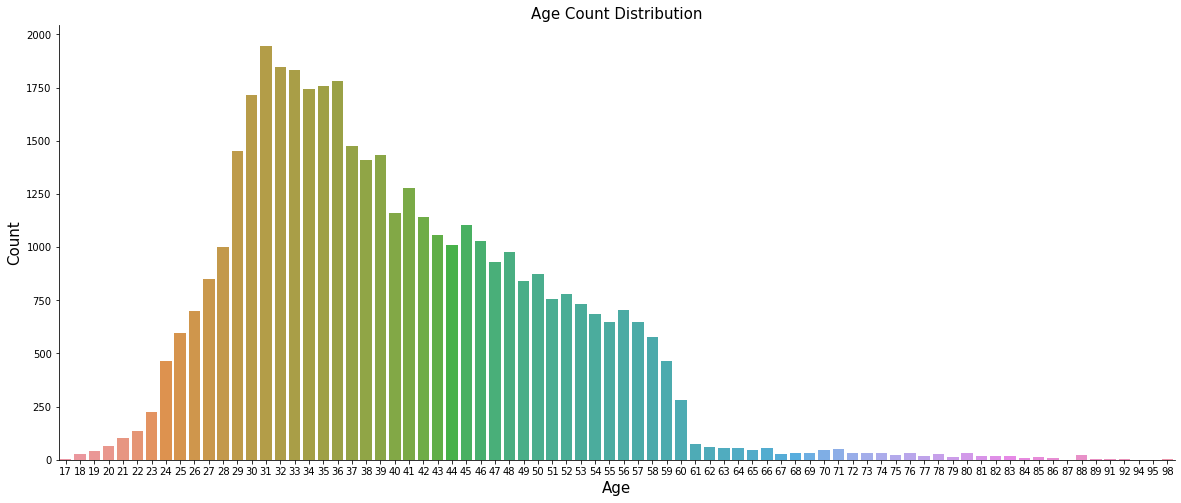

In [14]:
# AGE Distribution of the Bank Clients

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = train_data)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

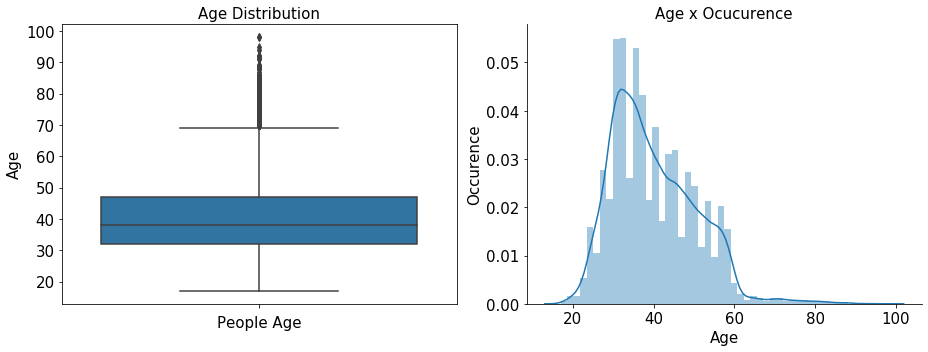

In [15]:
# How is the client age distributed, in occurences per age

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = train_data, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(train_data['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [16]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(train_data_client['age'].mean(), 1))

# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(train_data_client['age'].std(), 1))

# The best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(train_data_client['age'].std()*100/train_data_client['age'].mean(), 1), ', High middle dispersion')

MEAN: 40.0
STD : 10.4
CV  : 26.0 , High middle dispersion


In [17]:
# Age Quartiles

# Quartiles
print('1º Quartile: ', train_data['age'].quantile(q = 0.25))
print('2º Quartile: ', train_data['age'].quantile(q = 0.50))
print('3º Quartile: ', train_data['age'].quantile(q = 0.75))
print('4º Quartile: ', train_data['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', train_data['age'].quantile(q = 0.75) + 
                      1.5*(train_data['age'].quantile(q = 0.75) - train_data['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers


In [18]:
# More info about outliers

print('Numerber of outliers: ', train_data[train_data['age'] > 69.6]['age'].count())
print('Number of clients: ', len(train_data))
#Outliers in %
print('Outliers are:', round(train_data[train_data['age'] > 69.6]['age'].count()*100/len(train_data),2), '%')

Numerber of outliers:  469
Number of clients:  41188
Outliers are: 1.14 %


Summary:

- Most of the clients are aged between 30 and 50.
- Ages above 69.5 are outliers (low occurences), and consist of 469 cases (1.14%) of our dataset population.
- The Mean Age is aproximately 40 years old. (Minimum: 18 years old and Maximum: 95 years old.)
- The age standard deviation is 10.4 with a high-middle dispertion rate (26.0) this means clients age varies and doesn't strongly indicate if age is a decisive factor when deciding to open a term deposit.

# 1.3. JOBS


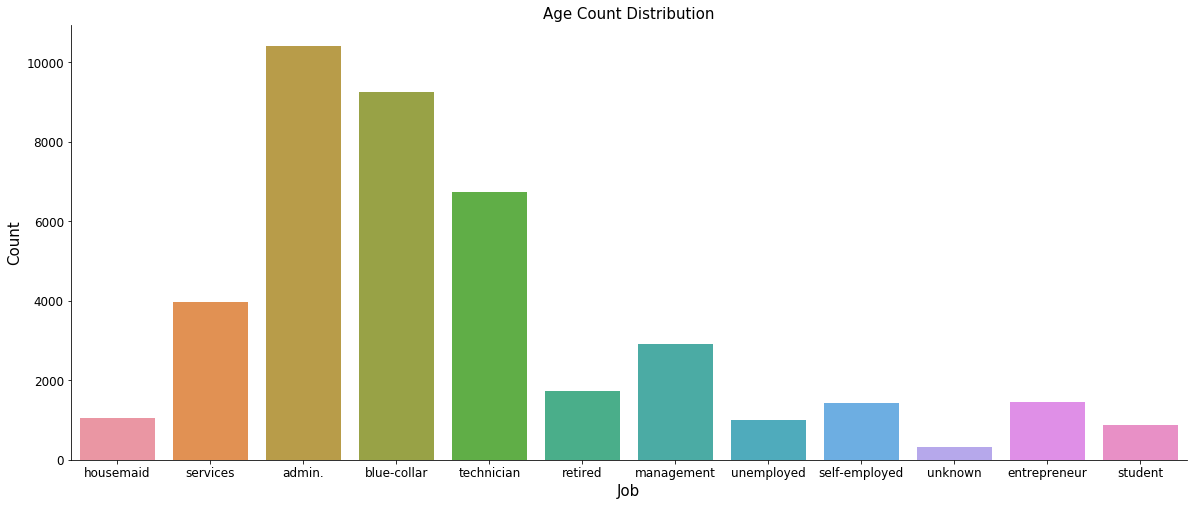

In [19]:
# What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = train_data_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=12)
sns.despine()

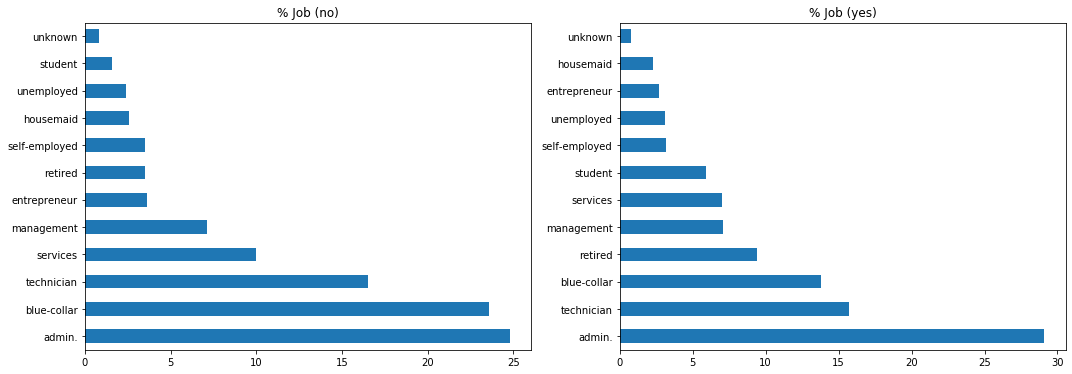

In [20]:
# What jobs did the clients who responded y='yes' have

f = plt.figure(figsize=(15,10))
plt.subplot(223)
plt.title('% Job (no)')
jobs_dist_no = train_data["job"][train_data["y"] == "no"].value_counts()
jobs_no = round(jobs_dist_no/(jobs_dist_no.sum())*100,1)
jobs_no.plot(kind = "barh")

plt.subplot(224)
plt.title('% Job (yes)')
jobs_dist_yes = train_data["job"][train_data["y"] == "yes"].value_counts()
jobs_yes = round(jobs_dist_yes/(jobs_dist_yes.sum())*100,1)
jobs_yes.plot(kind = "barh")

plt.tight_layout()

Summary:
- Number of Occupations:
- Admin and Blue collar and technician are the most prevalent occupations in this dataset.
- Among the occupations of the bank´s clients with the lowest occurences are : unknown, student, housemaid and unemployed.
- The monetary balance of the clients could have a high impact over the decision of subscribing for a term deposit or not. Clients with a larger balance ( probably due to a higher income) are more inclined to subscribe (y=yes).

# 1.4 MARITAL 

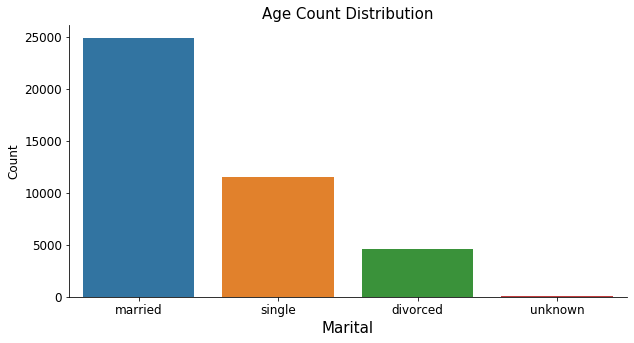

In [21]:
# What kind of 'marital status' the bank clients have

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = train_data_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=12)
sns.despine()

In [22]:
train_data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Summary:

- Most of the bank´s clients are married (24.928).

# 1.5 EDUCATION 

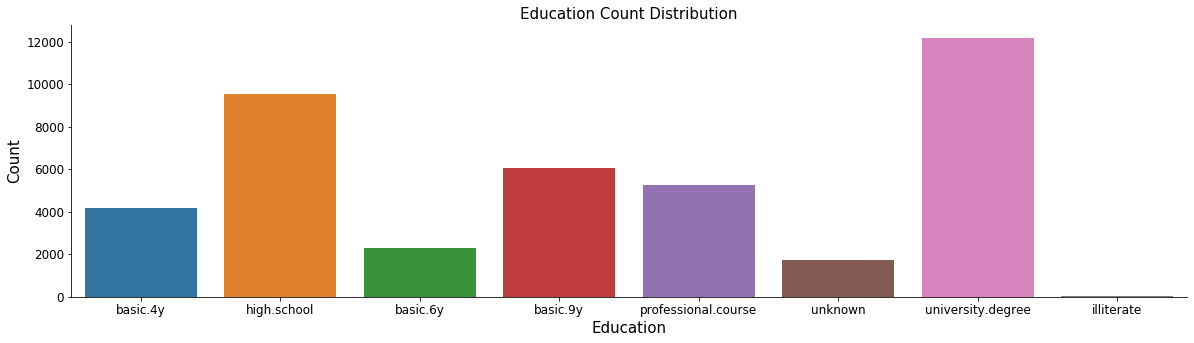

In [23]:
# What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation

fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = train_data_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=12)
sns.despine()

In [24]:
train_data_client['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

Summary:

- Most of the clients have a university degree, consisting of 12.168 occurences.
- 9515 clients have a high school degree.
- 1731 clients education level is unknown.

# 1.6. DEFAULT, HOUSING, LOAN

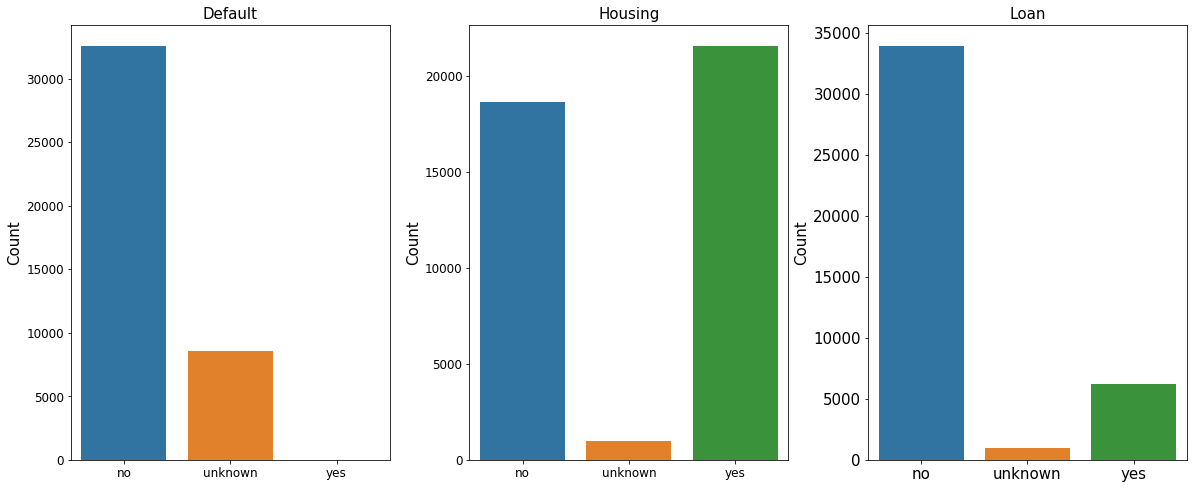

In [25]:
# Default, does the client have credit in default?
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = train_data_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=12)

# Housing,does the client have a housing loan?
sns.countplot(x = 'housing', data = train_data_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=12)

# Loan,does the client have a personal loan ?
sns.countplot(x = 'loan', data = train_data_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [26]:
print('Default:\n No credit in default:'     , train_data_client[train_data_client['default'] == 'no']     ['age'].count(),
              '\n Unknown credit in default:', train_data_client[train_data_client['default'] == 'unknown']['age'].count(),
              '\n Yes to credit in default:' , train_data_client[train_data_client['default'] == 'yes']    ['age'].count())

Default:
 No credit in default: 32588 
 Unknown credit in default: 8597 
 Yes to credit in default: 3


In [27]:
print('Housing:\n No loan in Housing::'     , train_data_client[train_data_client['housing'] == 'no']     ['age'].count(),
              '\n Loan in housing Unknown:', train_data_client[train_data_client['housing'] == 'unknown']['age'].count(),
              '\n Have loan in Housing:' , train_data_client[train_data_client['housing'] == 'yes']    ['age'].count())

Housing:
 No loan in Housing:: 18622 
 Loan in housing Unknown: 990 
 Have loan in Housing: 21576


In [28]:
print('Housing:\n No to personal loan:'     , train_data_client[train_data_client['loan'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', train_data_client[train_data_client['loan'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , train_data_client[train_data_client['loan'] == 'yes']    ['age'].count())

Housing:
 No to personal loan: 33950 
 Unknown to personal loan: 990 
 Yes to personal loan: 6248


Summary:

- Default, Housing and Loan do not seem to bring new relevant information for this project´s purpose.
- Job, Marital and Education are useful for the count of each variable. 

# 1.7. Bank Client Categorical Treatment

- In order to avoid errors in future data aplication in models, there is a need to transform categorical variables so they can fit properly into the model reqcuirements.

In [29]:
#  Use Label encoder from sklearn ( lbl encoder will organize subcategories alphabetically, and apply numbers to them)

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
train_data_client['job']      = labelencoder_X.fit_transform(train_data_client['job']) 
train_data_client['marital']  = labelencoder_X.fit_transform(train_data_client['marital']) 
train_data_client['education']= labelencoder_X.fit_transform(train_data_client['education']) 
train_data_client['default']  = labelencoder_X.fit_transform(train_data_client['default']) 
train_data_client['housing']  = labelencoder_X.fit_transform(train_data_client['housing']) 
train_data_client['loan']     = labelencoder_X.fit_transform(train_data_client['loan']) 

In [30]:
# Function to create age groups ( makes it easier, since there are 78 different age values in this set)
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(train_data_client);

In [31]:
# let's see how it looks now
train_data_client.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


- Note that the categories have been replaced by numbers. Each unique number is a representation of a subcategory ( i.e. married = 1 is equal to marital= married # remember that the lbl encoder has organized every subcategory alphabetically)

# Converting categorical variables for modeling purposes (check with/without) status= without

train_data_client = pd.get_dummies(data = train_data_client, columns = ['job'] , prefix = ['job'] , drop_first = True)

train_data_client = pd.get_dummies(data = train_data_client, columns = ['marital'] , prefix = ['marital'] , drop_first = True)

train_data_client = pd.get_dummies(data = train_data_client, columns = ['education'], prefix = ['education'], drop_first = True)

train_data_client = pd.get_dummies(data = train_data_client, columns = ['default'] , prefix = ['default'] , drop_first = True)

train_data_client = pd.get_dummies(data = train_data_client, columns = ['housing'] , prefix = ['housing'] , drop_first = True)

train_data_client = pd.get_dummies(data = train_data_client, columns = ['loan'] , prefix = ['loan'] , drop_first = True)

In [32]:
# Check how the client category of the dataset looks like now
print(train_data_client.shape)
train_data_client.head()

(41188, 7)


,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


- Note that a equivalent copy of the set has been created ( dummy set) which is used for modeling purposes
- For ML models, numbers are more easily interpreted than words, making numbers a better fit for computational purposes.

# 2. Related with the last contact of the current campaign

- Explore the atributes related to the current campaign
- For a more focused analysis, create new datasets that contain only the type of variables by section of the dataset desciption

In [33]:
# Slice the Data by Type : Related with the last contact of the current campaign
train_data_related = train_data.iloc[: , 7:11]
train_data_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [34]:
train_data_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [35]:
# Find out more about the variables in this category

print("\nType of Contact: \n", train_data_related['contact'].unique())
print("\nCampaign most active months: \n", train_data_related['month'].unique())
print("\nCampaign most active days of week: \n", train_data_related['day_of_week'].unique())


Type of Contact: 
 ['telephone' 'cellular']

Campaign most active months: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Campaign most active days of week: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


# 2.1 Duration

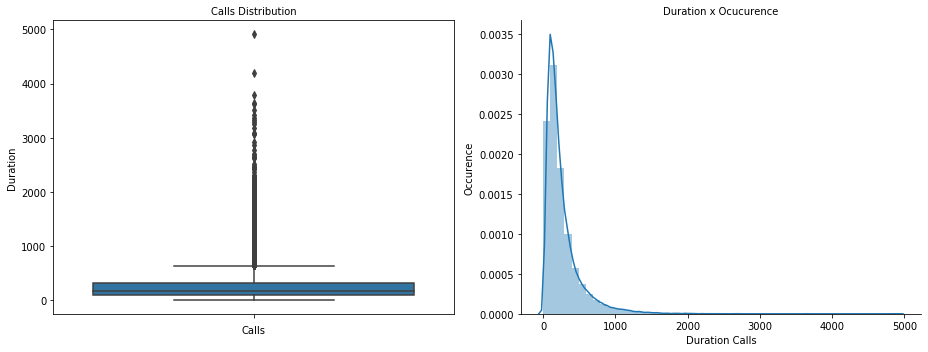

In [36]:
# Trying out a visual representation of call duration
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = train_data_related, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(train_data_related['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

- The duration variable has too many different values. It will be difficult to handle.
- For this reason, it is necessary to create an adjustment.

In [37]:
# As it was done before, with the age variable, intervals and limits can be created 
# use: .max())/60),1) if you prefer to divide by minutes

print("Max duration  call in seconds:  ", round((train_data_related['duration'].max()),1)) 
print("Min duration  call in seconds:   ", round((train_data_related['duration'].min()),1))
print("Mean duration call in seconds:   ", round((train_data_related['duration'].mean()),1))
print("STD duration  call in seconds:   ", round((train_data_related['duration'].std()),1))
# Std close to the mean means that the data values are close to the mean 

Max duration  call in seconds:   4918
Min duration  call in seconds:    0
Mean duration call in seconds:    258.3
STD duration  call in seconds:    259.3


In [38]:
# Quartiles
print('1º Quartile: ', train_data_related['duration'].quantile(q = 0.25))
print('2º Quartile: ', train_data_related['duration'].quantile(q = 0.50))
print('3º Quartile: ', train_data_related['duration'].quantile(q = 0.75))
print('4º Quartile: ', train_data_related['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', train_data_related['duration'].quantile(q = 0.75) + 
                      1.5*(train_data_related['duration'].quantile(q = 0.75) - train_data_related['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration calls above:  644.5 are outliers


In [39]:
# Look at outliers
print('Numerber of outliers: ', train_data_related[train_data_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(train_data_related))
#Outliers in %
print('Outliers are:', round(train_data_related[train_data_related['duration'] > 644.5]['duration'].count()*100/len(train_data_related),2), '%')

Numerber of outliers:  2963
Number of clients:  41188
Outliers are: 7.19 %


In [40]:
# How many calls have zero duration? 
train_data_related[train_data_related['duration'] == 0].count()

contact        4
month          4
day_of_week    4
duration       4
dtype: int64

# Duration adjustment

In [41]:
# To use in order to create interest levels # use 319 seconds as mean for Interest

def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(train_data_related);

- Using the quartiles of 'duration', 5 intervals have been created in order to categorize call duration as levels of interest.
- Promotion will be used to determine if a promotion has been made or not.
- If Promotion is equivalent to 3 (from 'duration') or below, it will be considered that the promotion has not been made (Promotion = no)
- If Promotion is above 3 (from 'duration') it will be considered that the promotion has been made ( Promotion = yes)

# 2.2 Contact, Month, Day of Week

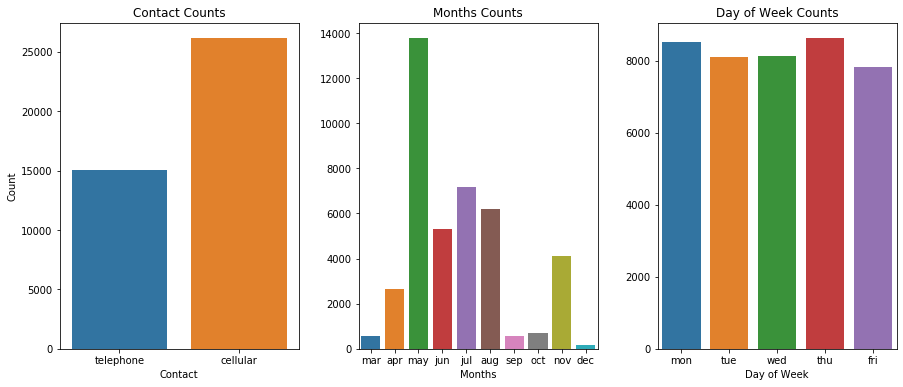

In [42]:
# More information and visual representation of Contact, Month and Day of week

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(train_data_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(train_data_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(train_data_related['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

# 2.3 Contact, Month, Day of Week  Categorical Treatment

In [43]:
#  Use Label encoder from sklearn ( lbl encoder will organize subcategories alphabetically, and apply numbers to them) 

# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
train_data_related['contact']     = labelencoder_X.fit_transform(train_data_related['contact']) 
train_data_related['month']       = labelencoder_X.fit_transform(train_data_related['month']) 
train_data_related['day_of_week'] = labelencoder_X.fit_transform(train_data_related['day_of_week']) 

# Converting categorical variables for modeling purposes (check with/without) status= without dummies

train_data_related = pd.get_dummies(data = train_data_related, prefix = ['contact'] , columns = ['contact'] , drop_first = True)

train_data_related = pd.get_dummies(data = train_data_related, prefix = ['month'] , columns = ['month'] , drop_first = True)

train_data_related = pd.get_dummies(data = train_data_related, prefix = ['day_of_week'], columns = ['day_of_week'], drop_first = True)

In [44]:
# # Check how the related category of the dataset looks like now
train_data_related.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


# 3. Other attributes 

- Explore the atributes related to the other attributes
- For a more focused analysis, create new datasets that contain only the type of variables by section of the dataset desciption

In [45]:
# Check how the data looks
train_data_o = train_data.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
train_data_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [46]:
# Number of contacts performed during this campaign and for this client (numeric, includes last contact)
train_data_o['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

In [47]:
# number of days that passed by after the client was last contacted from a previous campaign
# (numeric; 999 means client was not previously contacted)
train_data_o['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [48]:
# Number of contacts performed before this campaign and for this client (numeric)
train_data_o['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [49]:
# Outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
train_data_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [50]:
# Only one categorical valiable in this type of information
#  Replace labels in order to create a better fit for the model
train_data_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

# 4. Social and economic context attributes

In [51]:
# Check how the data looks
train_data_se = train_data.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
train_data_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


- All variables in this type of information category are numeric, hence, they do not need to be labeled or replaced by dummy variables.

# PART III

# Preprocessing

In [52]:
# Build a dataset with the parts that were sliced and transformed in PART II
train_data_final= pd.concat([train_data_client, train_data_related, train_data_o, train_data_se],axis = 1)
train_data_final = train_data_final[['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','campaign','pdays','previous','poutcome']]
train_data_final.shape

(41188, 20)

In [53]:
# Take a look if everything is in order and properly shaped
## Use train_data_final from here on out
train_data_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
0,3,3,1,0,0,0,0,1,6,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
1,3,7,1,3,1,0,0,1,6,1,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
2,2,7,1,3,0,2,0,1,6,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
3,2,0,1,1,0,0,0,1,6,1,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
4,3,7,1,3,0,0,2,1,6,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1


- The train_data_final has ended up with 41188 rows and 20 columns of adapted data, ready to use for the ML models.

In [54]:
# TRAIN-TEST SPLIT (RATIO- 80/20)
## It´s a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data.
## With this function, you don't need to divide the dataset manually.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_final, y, test_size = 0.1942313295, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

- It´s a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data.
- With this function, you don't need to divide the dataset manually.
- The training set contains a known output and the model learns on this data in order to be generalized to other data later on.
- We have the test dataset (or subset) in order to test our model's prediction on this subset.
- Source:
https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [55]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
38912,3,5,1,6,0,2,0,0,7,4,5,-3.4,92.649,-30.1,0.716,5017.5,2,3,3,3
9455,2,7,1,5,1,0,0,1,4,0,2,1.4,94.465,-41.8,4.967,5228.1,1,999,0,1
14153,1,4,1,6,0,2,0,0,3,1,5,1.4,93.918,-42.7,4.962,5228.1,3,999,0,1
25021,3,6,1,6,0,2,0,0,7,3,1,-0.1,93.200,-42.0,4.153,5195.8,1,999,0,1
30911,2,5,0,0,0,2,2,0,6,3,3,-1.8,92.893,-46.2,1.344,5099.1,2,999,1,2


In [56]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

- Standard Scaler : data normalization tool from sklearn
- Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.
- Source:
https://en.wikipedia.org/wiki/Feature_scaling

# Machine Learning Algorithms - Approaches



- In order to interpret the results:

- Create mini-section for Confusion Matrix = cm

# Logistic regression

In [57]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6909  164]
 [ 598  329]]
90.0


- Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.).
- Source: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

# KNeighborsClassifier

- 1. Split the dataset into two pieces: a training set and a testing set.
- 2. Train the model on the training set.
- 3. Test the model on the testing set, and evaluate how well it did.

k=1 87.84 (+/- 0.59)
k=2 89.73 (+/- 0.50)
k=3 89.69 (+/- 0.49)
k=4 90.02 (+/- 0.51)
k=5 89.98 (+/- 0.41)
k=6 90.07 (+/- 0.47)
k=7 90.24 (+/- 0.41)
k=8 90.28 (+/- 0.48)
k=9 90.33 (+/- 0.46)
k=10 90.35 (+/- 0.49)
k=11 90.33 (+/- 0.51)
k=12 90.32 (+/- 0.59)
k=13 90.37 (+/- 0.51)
k=14 90.40 (+/- 0.48)
k=15 90.44 (+/- 0.47)
k=16 90.41 (+/- 0.50)
k=17 90.41 (+/- 0.50)
k=18 90.38 (+/- 0.52)
k=19 90.43 (+/- 0.45)
k=20 90.38 (+/- 0.48)
k=21 90.42 (+/- 0.46)
k=22 90.37 (+/- 0.48)
k=23 90.45 (+/- 0.44)
k=24 90.34 (+/- 0.49)
k=25 90.44 (+/- 0.47)
The optimal number of neighbors is 22 with 90.4%


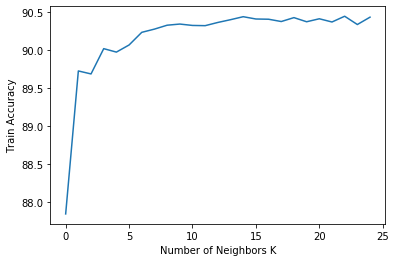

In [58]:
# 1. Split the dataset into two pieces: a training set and a testing set.
# 2. Train the model on the training set.

from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(train_data_final, y, test_size = 0.2, random_state = 101)

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))
    optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

- The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.
- KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).
- Source: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

- In this case , the optimim value for k is 22. With an accuracy of 90.4%.

In [59]:
# 3. Test the model on the testing set, and evaluate how well it did.

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6962  111]
 [ 684  243]]
90.0


# SVC - (Support Vector Classifier)

- The objective of a Linear SVC (Support Vector Classifier) is to fit to the data that is provided, returning a "best fit" hyperplane that divides, or categorizes the data.


In [60]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6531  542]
 [ 584  343]]
86.0


# Decision Tree Classifier

- Decision tree learning is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves).
- Source: https://en.wikipedia.org/wiki/Decision_tree_learning

In [61]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())


[[6621  452]
 [ 483  444]]
88.0


# Random Forest Classifier

- Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.
- Source: https://en.wikipedia.org/wiki/Random_forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6797  276]
 [ 484  443]]
90.0


# Gaussian NB

- A Gaussian Naive Bayes algorithm is a special type of NB algorithm. It's specifically used when the features have continuous values. It's also assumed that all the features are following a gaussian distribution i.e, normal distribution.
- Source: https://dataaspirant.com/gaussian-naive-bayes-classifier-implementation-python/

In [63]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6272  801]
 [ 417  510]]
85.0


# XGB Classifier

- XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.
- It is used in predicting problems involving unstructured data (images, text, etc.) and can be used to solve regression, classification, ranking, and user-defined prediction problems.

In [64]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

[[6796  277]
 [ 462  465]]
91.0


# Gradient Boosting Classifier

- Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.
- Source: https://en.wikipedia.org/wiki/Gradient_boosting

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())


[[6826  247]
 [ 460  467]]
91.0


# Results:

In [66]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
7,Gradient Boosting,0.914306
6,XGBoost,0.910932
0,Random Forest Classifier,0.909907
4,Logistic Model,0.909666
3,K-Near Neighbors,0.904815
1,Decision Tree Classifier,0.885049
2,Support Vector Machine,0.855550
5,Gausian NB,0.844432


Accuracy is measured by the area under the ROC curve.
If the ROC curve is close to 1, the better the test;
If the ROC curve is close to .5, the worse the test.

A simple representation is used for classifying the accuracy of a diagnostic test:

.90-1 = excellent (A)

.80-.90 = good (B)

.70-.80 = fair (C)

.60-.70 = poor (D)

.50-.60 = fail (F)

# ROC & AUC curves

- AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes.
- Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.
- Source: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

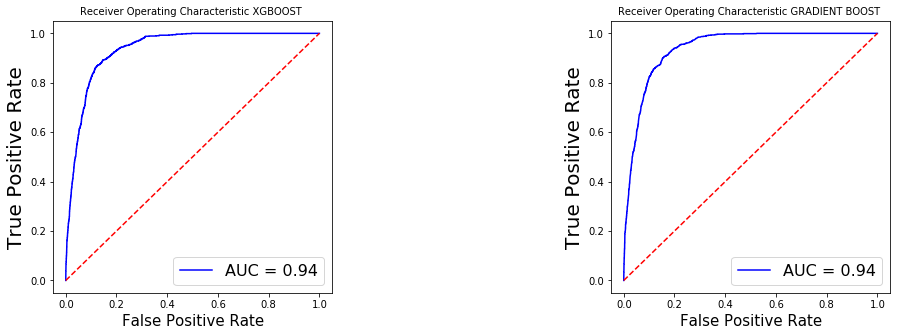

In [67]:
# XGB Classifier  ROC / AUC

from sklearn import metrics
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

#Gradient Boost Classifier ROC / AUC

probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax1.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

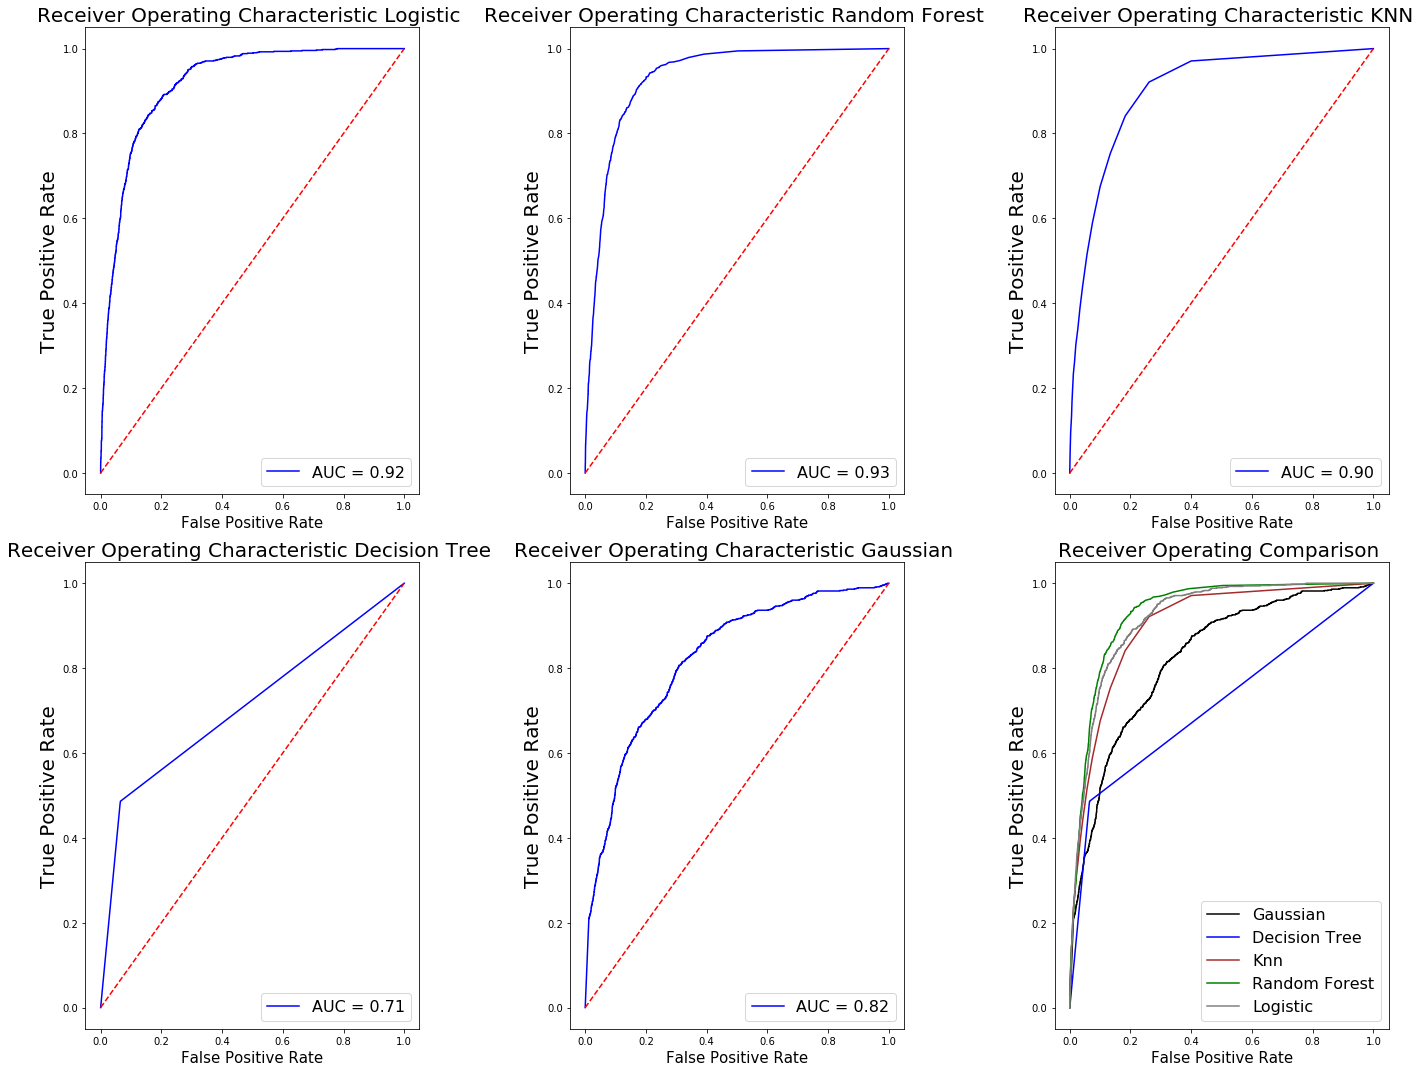

In [68]:
# Other Models
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#GAUSSIAN ---------------------
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

Results:
- Gradient Boosting classifier is the best model to predict whether or not a potential client will suscribe to a term deposit or not (y).
- For uplift modeling, as stated in Floris Devriendt,et. al, "One group of techniques that consistently perform well concern the ensemble approaches,such as the uplift random forests techniques."
- The Random forest approach shall also be considered, as there will be 2 dependent variables instead of 1.
- The second dependent variable will be 'Promotion':
 Is the result of 'duration' , where duration, divided into 5 time groups [1,2,3,4,5]
 Promotion is 'yes' when duration is >= 3
 Promotion is 'no' when duration is < 3
 
The 'duration' threshold (3) separates customers who show/do not show interest in the promotion after the initial contact.
This represents the duration needed, in order to get a customer´s interest in the Promotion.

